<h2>Finding Heavy Traffic Indicators on I-94</h2>
Analyzing a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd

metro_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

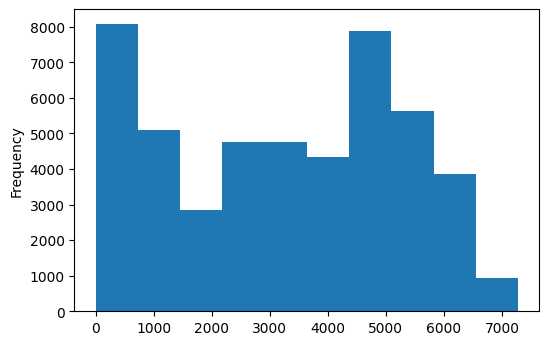

In [3]:
#plotting the histogram to examine the distribution of the traffic_volume 
import matplotlib.pyplot as plt
%matplotlib inline

metro_traffic['traffic_volume'].plot.hist()
plt.show()

In [4]:
metro_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
metro_traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

We'll start by dividing the dataset into two parts:
<ul>
    <li>Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)</li>
    <li>Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)</li>
</ul>
While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
metro_traffic['date_time'] = pd.to_datetime(metro_traffic['date_time']) 

In [7]:
metro_traffic['date_time'].head(10)

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
5   2012-10-02 14:00:00
6   2012-10-02 15:00:00
7   2012-10-02 16:00:00
8   2012-10-02 17:00:00
9   2012-10-02 18:00:00
Name: date_time, dtype: datetime64[ns]

Using the Series.dt.hour property to get the hour of every instance of the date_time column and doing the following:
<ul>
    <li>Isolate the daytime data.</li>
    <li>Isolate the nighttime data.</li>
</ul>

In [8]:
daytime = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour >= 7) & (metro_traffic['date_time'].dt.hour < 19)]
print(daytime.shape)

night_time = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour >= 19) | (metro_traffic['date_time'].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


<h3>Comparing the traffic volume at night and during day.</h3>

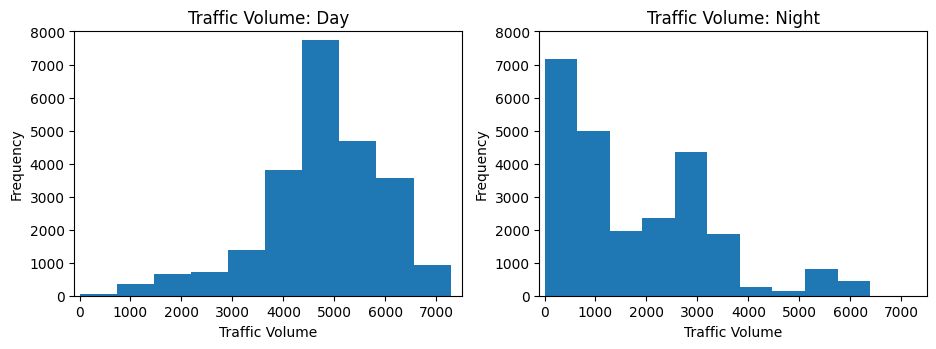

In [9]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night_time['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [10]:
daytime['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed which mean that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

<h2> Analyzing the daytime dataset to know the casues of traffic</h2>
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

<ul>
    <li>Month</li>
    <li>Day of the week</li>
    <li>Time of day</li>
</ul>

In [12]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

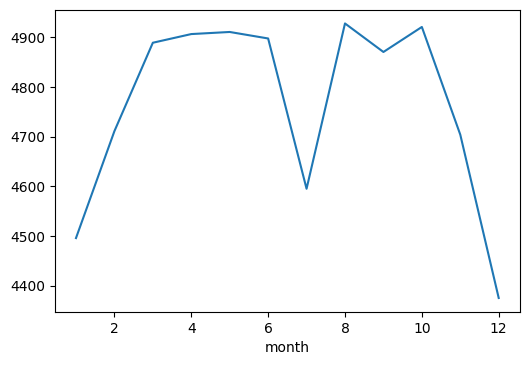

In [13]:
by_month['traffic_volume'].plot.line()
plt.show()

From the line plot we can see there is a steady from the 2nd month to the 3rd month and it's stable at that point till the 6th month which then starts to go down till the 7th month and there is another sharp increase at that month till the 9th month which then descrease and have another inrease til the 11th month went downwards till the 12th month. This is to show that from the 3rd month to the 7th month there is a high volume traffic

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code:

In [14]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

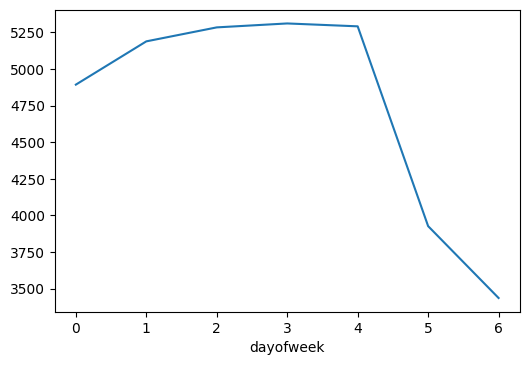

In [15]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

There is high volume of Traffic from monday to friday and less trafic on sunday and saturday, the traffic volume is significantly heavier on business days compared to the weekends

Generating a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [16]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


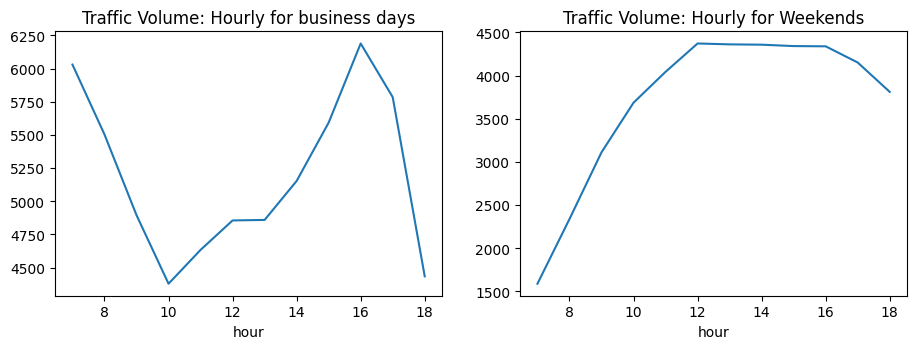

In [17]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume: Hourly for business days')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume: Hourly for Weekends')

plt.show()

We've focused on finding time indicators for heavy traffic, and we reached the following conclusions:
<ul>
    <li>The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).</li>
    <li>The traffic is usually heavier on business days compared to weekends.</li>
    <li>On business days, the rush hours are around 7 and 16.</li>
</ul>

<h1> Weather Indicator</h1>
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

In [18]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The traffic volume is strongly correlated with the temp column

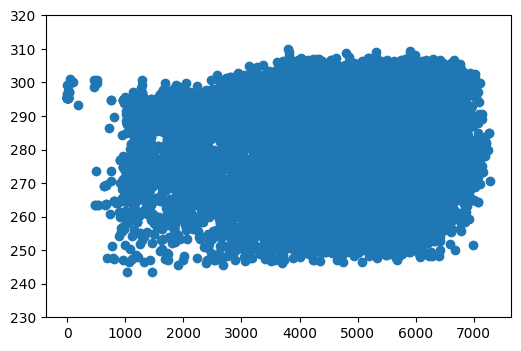

In [19]:
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.ylim(230, 320)
plt.show()

Temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

<h2> Weather types</h2>

We're going to calculate the average traffic volume associated with each unique value in these two columns.We grouped the data by weather_main and weather_description while using the mean as an aggregate function.

Let's create a bar plot for the traffic_volume column of by_weather_main and by_weather_description.

In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

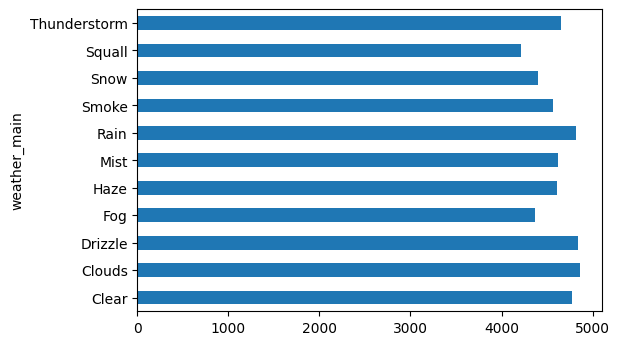

In [21]:
by_weather_main['traffic_volume'].plot.barh()

There are no  traffic volume exceeding 5,000 cars and thunderstorm, rain, drizzle, clouds, and clear are heavy traffic indicators 

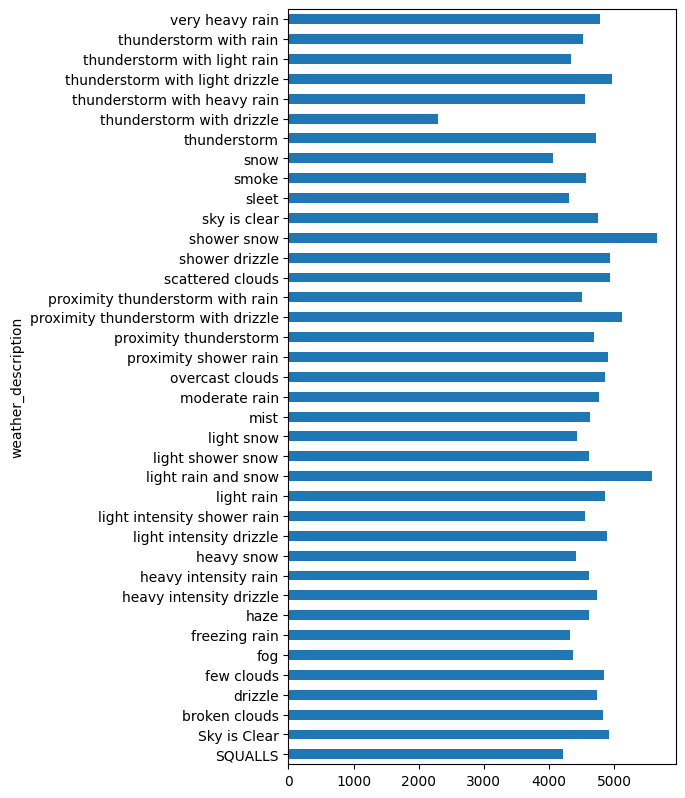

In [22]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

<ul><li>Time indicators</li>
    <ul><li>The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).</li>
        <li>The traffic is usually heavier on business days compared to the weekends.</li>
        <li>On business days, the rush hours are around 7 and 16.</li></ul></ul>
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle

Next steps include the following:

<ul><li>Use the nighttime data to look for heavy traffic indicators.</li>
    <li>Find more time and weather indicators.</li></ul>

<h2> Analyzing the night_time dataset to know the casues of traffic</h2>
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

<ul>
    <li>Month</li>
    <li>Day of the week</li>
    <li>Time of day</li>
</ul>

In [23]:
night_time['month'] = night_time['date_time'].dt.month
by_month_night = night_time.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

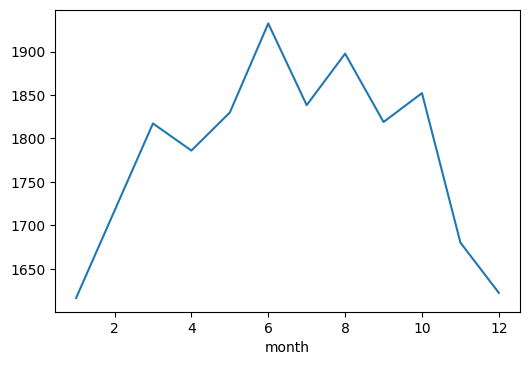

In [24]:
#Plotting the line graph of the traffic_volume
by_month_night['traffic_volume'].plot.line()
plt.show()

From the line plot we can see there is a steady increase from the January to the March and it's starts to go down till around April, then we have an increase from April till June, another decrease till July and so on

The traffic looks heavy during cold months (January–march) and more intense during warm months (March–October), with with a sharp decline the cold months of around october to December the line plot looks zigzagly in nature. Is there anything special about July? Is traffic significantly less heavy in July each year?


We'll now continue with building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we'll need to use the following code:

In [25]:
night_time['dayofweek'] = night_time['date_time'].dt.dayofweek
by_dayofweek_night = night_time.groupby('dayofweek').mean()
by_dayofweek_night['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

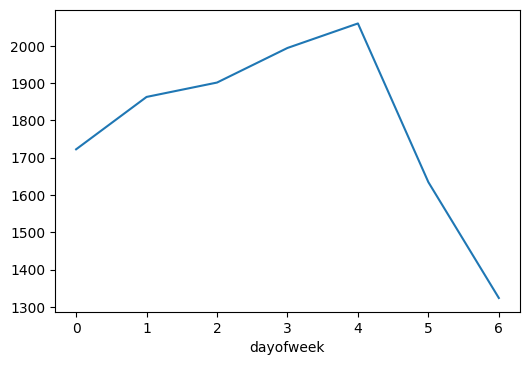

In [26]:
by_dayofweek_night['traffic_volume'].plot.line()
plt.show()

There is high volume of Traffic from monday to friday night and less trafic on sunday and saturday, the traffic volume is significantly heavier on business days compared to the weekends

Generating a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [27]:
night_time['hour'] = night_time['date_time'].dt.hour
bussiness_night = night_time.copy()[night_time['dayofweek'] <= 4] # 4 == Friday
weekend_night = night_time.copy()[night_time['dayofweek'] >= 5] # 5 == Saturday
by_hour_business_night = bussiness_night.groupby('hour').mean()
by_hour_weekend_night = weekend_night.groupby('hour').mean()

print(by_hour_business_night['traffic_volume'])
print(by_hour_weekend_night['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


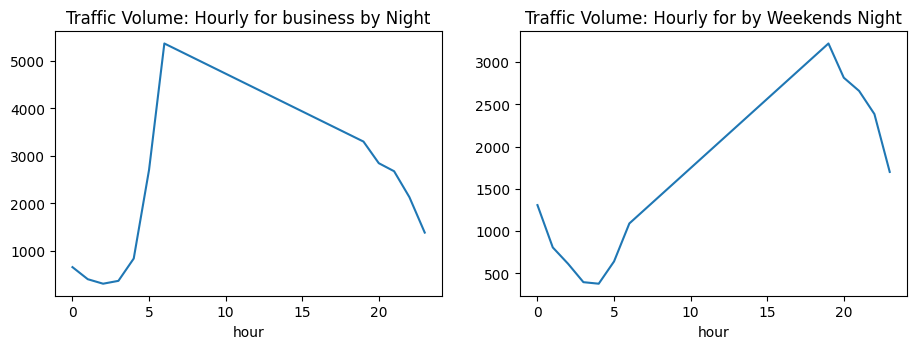

In [31]:
#plotting the line graph for Traffic volume by business days and by Night
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business_night['traffic_volume'].plot.line()
plt.title('Traffic Volume: Hourly for business by Night')

plt.subplot(1, 2, 2)
by_hour_weekend_night['traffic_volume'].plot.line()
plt.title('Traffic Volume: Hourly for by Weekends Night')

plt.show()

We've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

<ul>
    <li>The traffic is usually heavier during warm months (January–October) compared to cold months (October–December).</li>
    <li>The traffic is usually heavier on business days compared to weekends.</li>
    <li>On business days, the rush hours are around 3 and 6 which then plummet from 7 - past 20.</li>
    <li>while weekends there is a sharp increase from 4 to 17.</li>
</ul>

# Weather Indicator
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.


In [32]:
night_time.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
dayofweek        -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

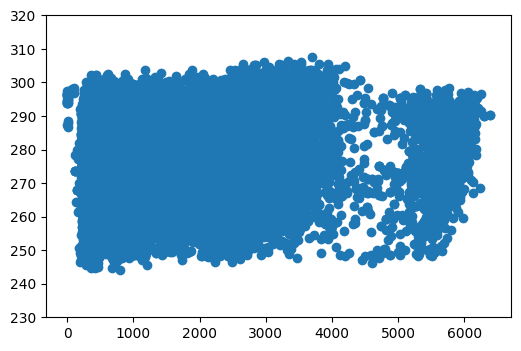

In [33]:
#The traffic volume is strongly correlated with the temp column

plt.scatter(night_time['traffic_volume'], night_time['temp'])
plt.ylim(230, 320)
plt.show()

Temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

# Weather types
We're going to calculate the average traffic volume associated with each unique value in these two columns. we grouped the data by weather_main and weather_description while using the mean as an aggregate function.

Let's create a bar plot for the traffic_volume column of by_weather_main and by_weather_description.

In [34]:
by_weather_main_night = night_time.groupby('weather_main').mean()
by_weather_description_night = night_time.groupby('weather_description').mean()

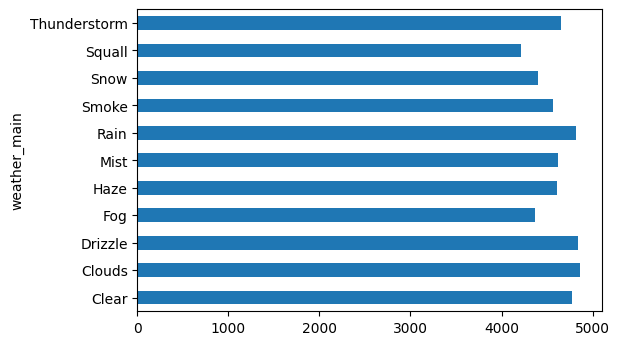

In [35]:
by_weather_main['traffic_volume'].plot.barh()

There are no traffic volume exceeding 5,000 cars and thunderstorm, rain, drizzle, clouds, and clear are heavy traffic indicators

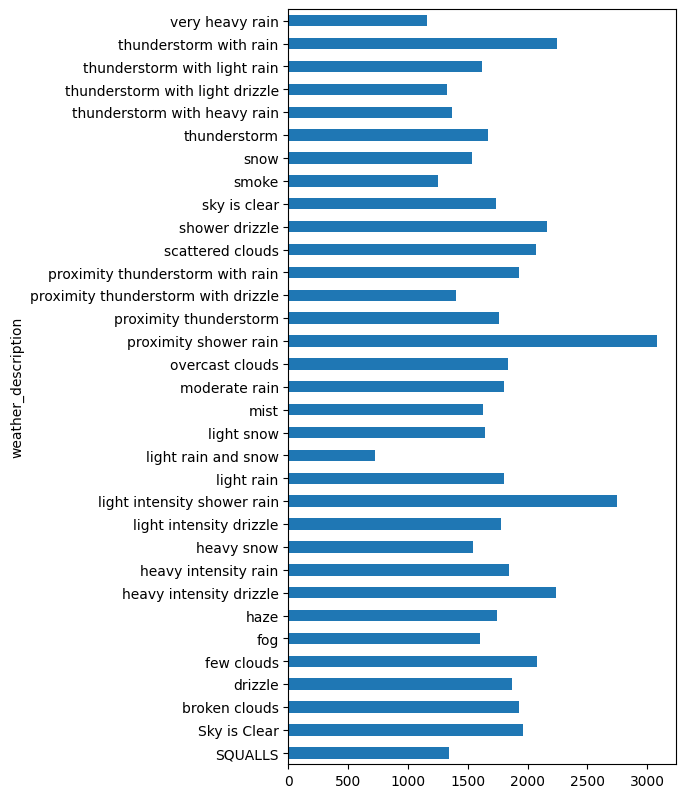

In [36]:
by_weather_description_night['traffic_volume'].plot.barh(figsize=(5,10))

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

<h4>Time indicators</h4>
<ul><ol>The traffic is usually heavier during warm months (January–October) compared to cold months (October–December).</ol>
<ol>The traffic is usually heavier on business days compared to weekends.</ol>
<ol>On business days, the rush hours are around 3 and 6 which then plummet from 7 - past 20.</ol></ul>

Weather indicators Shower snow Light rain and snow Proximity thunderstorm with drizzle